In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38119 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.49 GB


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/ryf9091.db')

In [4]:
exptdict = OrderedDict([
    ('01deg_RYF9091',   {'expt':'01deg_jra55v13_ryf9091','dir':'access-om2-01'}),
    ('025deg_RYF9091',  {'expt':'025deg_jra55_ryf9091_gadi','dir':'access-om2-025'}),
    ('1deg_RYF9091',  {'expt':'1deg_jra55_ryf9091_gadi','dir':'access-om2'})
                        ])

In [13]:
for ekey in exptdict.keys():
    variable = 'age_global'
    expt = exptdict[ekey]['expt']
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc')
    print(expt)
    print(var.time.max())

01deg_jra55v13_ryf9091
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2088, 6, 16, 0, 0, 0, 0, 0, 167), dtype=object)
025deg_jra55_ryf9091_gadi
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2397, 12, 16, 12, 0, 0, 0, 2, 350),
      dtype=object)
1deg_jra55_ryf9091_gadi
<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2419, 7, 2, 12, 0, 0, 0, 4, 183), dtype=object)


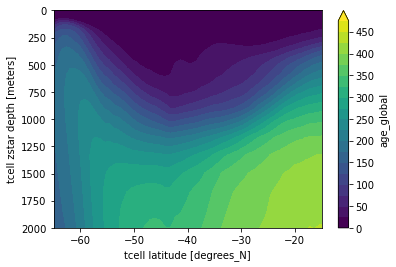

In [27]:
variable = 'age_global'
expt='1deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2400-01-01')
age = var.mean('time').mean('xt_ocean')
age.plot.contourf(levels=np.arange(20)*25)
plt.xlim([-65,-15])
plt.ylim([0,2000])
plt.gca().invert_yaxis()

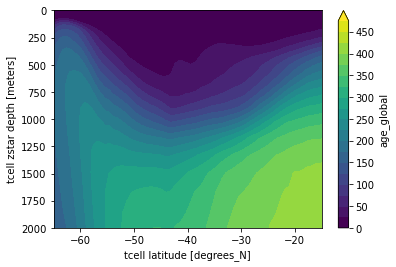

In [29]:
variable = 'age_global'
expt='025deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2380-01-01')
age = var.mean('time').mean('xt_ocean')
age.plot.contourf(levels=np.arange(20)*25)
plt.xlim([-65,-15])
plt.ylim([0,2000])
plt.gca().invert_yaxis()

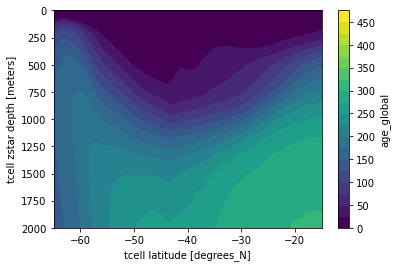

In [30]:
variable = 'age_global'
expt='01deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2070-01-01')
age = var.mean('time').mean('xt_ocean')
age.plot.contourf(levels=np.arange(20)*25)
plt.xlim([-65,-15])
plt.ylim([0,2000])
plt.gca().invert_yaxis()